# Project Introduction

### Importing the necessary libraries

In [1]:
# Data Manipulation
import pandas as pd

# Regular Expression
import re
import string

# Import Nltk libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Plot the Graphs
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Data loading

In [2]:
# upgrading pandas
# !pip install --upgrade pandas

In [3]:
# Loading the data
data = pd.read_csv('sentiment_tweets_2022.csv', dtype_backend='pyarrow')

In [4]:
data.head(5)

,Unnamed: 0,User,User_Location,Followers_Count,User_Created,User_Description,User_Statuses_Count,Tweet_Date,Num_Likes,Num_Retweets,...,Tweet_Source,Tweet,Sentiment,Cleaned_Tweet,Pos_Tags,Adjectives,Nouns,Verbs,Named Entities,All Entities
0,0,Pucci1989Mon,<NA>,1790.0,2015-11-17 19:18:54+00:00,Most of my Tweets are an attempt at sarcasm …S...,35828.0,2023-01-30 17:34:45+00:00,0.0,0.0,...,Twitter Web App,@_angelica_toy Happy Anniversary!!!....The Day...,0.2444,_angelica_toy Happy Anniversary!!! The Day ...,"[('_angelica_toy', 'NN'), ('Happy', 'NNP'), ('...","['""American']","['_angelica_toy', 'Happy', 'Anniversary!!!', '...","['', '(In']","[('Anniversary', 'DATE'), ('The Day', 'DATE'),...","['Anniversary', 'The Day', ""Don McLean's"", 'Am..."
1,1,Pucci1989Mon,<NA>,1790.0,2015-11-17 19:18:54+00:00,Most of my Tweets are an attempt at sarcasm …S...,35828.0,2023-01-30 17:34:33+00:00,0.0,0.0,...,Twitter Web App,@McfarlaneGlenda Happy Anniversary!!!....The D...,0.2444,McfarlaneGlenda Happy Anniversary!!! The Da...,"[('McfarlaneGlenda', 'NNP'), ('Happy', 'NNP'),...","['""American']","['McfarlaneGlenda', 'Happy', 'Anniversary!!!',...","['', '(In']","[('McfarlaneGlenda', 'ORG'), ('Anniversary', '...","['McfarlaneGlenda', 'Anniversary', 'The Day', ..."
2,2,Pucci1989Mon,<NA>,1790.0,2015-11-17 19:18:54+00:00,Most of my Tweets are an attempt at sarcasm …S...,35828.0,2023-01-30 17:34:24+00:00,0.0,0.0,...,Twitter Web App,@thevivafrei @JustinTrudeau Happy Anniversary!...,0.2444,thevivafrei JustinTrudeau Happy Anniversary!!!...,"[('thevivafrei', 'NN'), ('JustinTrudeau', 'NNP...","['""American']","['thevivafrei', 'JustinTrudeau', 'Happy', 'Ann...","['', '(In']","[('thevivafrei JustinTrudeau', 'PERSON'), ('Th...","['thevivafrei JustinTrudeau', 'The Day', ""Don ..."
3,3,Pucci1989Mon,<NA>,1790.0,2015-11-17 19:18:54+00:00,Most of my Tweets are an attempt at sarcasm …S...,35828.0,2023-01-30 17:34:15+00:00,0.0,0.0,...,Twitter Web App,@NChartierET Happy Anniversary!!!....The Day t...,0.2444,NChartierET Happy Anniversary!!! The Day th...,"[('NChartierET', 'NNP'), ('Happy', 'NNP'), ('A...","['""American']","['NChartierET', 'Happy', 'Anniversary!!!', '',...","['', '(In']","[('NChartierET', 'PERSON'), ('Anniversary', 'D...","['NChartierET', 'Anniversary', 'The Day', ""Don..."
4,4,Pucci1989Mon,<NA>,1790.0,2015-11-17 19:18:54+00:00,Most of my Tweets are an attempt at sarcasm …S...,35828.0,2023-01-30 17:33:59+00:00,0.0,0.0,...,Twitter Web App,@tabithapeters05 Happy Anniversary!!!....The D...,0.2444,tabithapeters05 Happy Anniversary!!! The Da...,"[('tabithapeters05', 'NN'), ('Happy', 'NNP'), ...","['""American']","['tabithapeters05', 'Happy', 'Anniversary!!!',...","['', '(In']","[('The Day', 'DATE'), (""Don McLean's"", 'PERSON...","['The Day', ""Don McLean's"", 'American Pie', 'F..."


### EDA

In [5]:
# Shape of data
data.shape

(451332, 27)

In [6]:
# Copy the data to a new dataframe
df = data.copy()

In [7]:
# Checking if we have any nulls
df.isna().sum()

Unnamed: 0                  0
User                        0
User_Location          162833
Followers_Count             0
User_Created                0
User_Description        69280
User_Statuses_Count         0
Tweet_Date                  0
Num_Likes                   1
Num_Retweets                1
Num_Quotes                  0
Num_Replies                 0
Url                         0
Coordinates            446109
Tweet_Place            446112
Hashtags               310631
Tweet_Lang                  1
Tweet_Source                1
Tweet                       1
Sentiment                   0
Cleaned_Tweet              17
Pos_Tags                    0
Adjectives                  0
Nouns                       0
Verbs                       0
Named Entities              0
All Entities                0
dtype: int64

We are not even using all the features. We only need cleaned_tweet. We don't even need to take care of all the nulls.

In [8]:
# Selecting only specific features
select_columns = ['Sentiment' , 'Cleaned_Tweet']
new_df = df[select_columns]

In [9]:
# Display first five rows
new_df.head(5)

,Sentiment,Cleaned_Tweet
0,0.2444,_angelica_toy Happy Anniversary!!! The Day ...
1,0.2444,McfarlaneGlenda Happy Anniversary!!! The Da...
2,0.2444,thevivafrei JustinTrudeau Happy Anniversary!!!...
3,0.2444,NChartierET Happy Anniversary!!! The Day th...
4,0.2444,tabithapeters05 Happy Anniversary!!! The Da...


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451332 entries, 0 to 451331
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   Sentiment      451332 non-null  double[pyarrow]
 1   Cleaned_Tweet  451315 non-null  string[pyarrow]
dtypes: double[pyarrow](1), string[pyarrow](1)
memory usage: 73.2 MB


In [11]:
new_df.isna().sum()

Sentiment         0
Cleaned_Tweet    17
dtype: int64

In [12]:
new_df = new_df.dropna()

In [13]:
new_df.isna().sum()

Sentiment        0
Cleaned_Tweet    0
dtype: int64

In [14]:
new_df['Sentiment'].describe()

count    451315.000000
mean          0.334008
std           0.494349
min          -0.992700
25%           0.000000
50%           0.520900
75%           0.705200
max           0.997600
Name: Sentiment, dtype: double[pyarrow]

In [15]:
# labels
sentiment_category = []

# Categorize sentiment
for score in new_df['Sentiment']:
    if score > 0:
        sentiment_category.append('positive')
    else:
        sentiment_category.append('negative')

# Create a new column with sentiment category
new_df['Sentiment_category'] = sentiment_category


This part is not needed unless we have the categorical data.

In [16]:
new_df.head(5)

,Sentiment,Cleaned_Tweet,Sentiment_category
0,0.2444,_angelica_toy Happy Anniversary!!! The Day ...,positive
1,0.2444,McfarlaneGlenda Happy Anniversary!!! The Da...,positive
2,0.2444,thevivafrei JustinTrudeau Happy Anniversary!!!...,positive
3,0.2444,NChartierET Happy Anniversary!!! The Day th...,positive
4,0.2444,tabithapeters05 Happy Anniversary!!! The Da...,positive


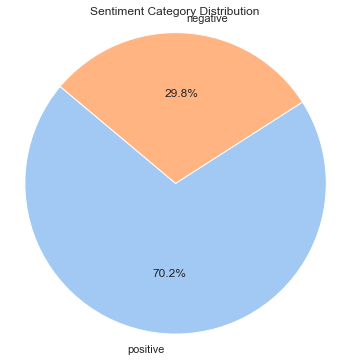

In [17]:
# Count the occurrences of each sentiment category
sentiment_counts = new_df['Sentiment_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Sentiment Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [18]:
sentiment_counts

Sentiment_category
positive    316735
negative    134580
Name: count, dtype: int64

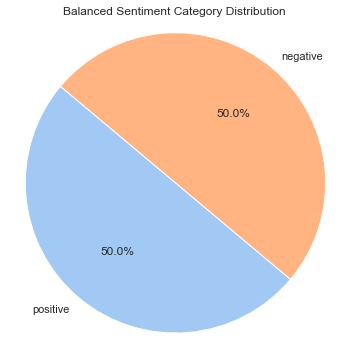

In [19]:
# Sample positive sentiment samples to balance the data
positive_samples = new_df[new_df['Sentiment_category'] == 'positive'].sample(n=sentiment_counts['negative'] , random_state=42)

# Concatenate the selected positive samples with the neutral and negative samples
balanced_df = pd.concat([positive_samples, new_df[new_df['Sentiment_category'] != 'positive']], ignore_index=True)

# Create a pie chart
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(balanced_df['Sentiment_category'].value_counts(), labels = balanced_df['Sentiment_category'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Balanced Sentiment Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit and transform the column in the dataframe to get encoded labels
balanced_df['Sentiment_label'] = le.fit_transform(balanced_df['Sentiment_category'])

In [21]:
balanced_df.head()

,Sentiment,Cleaned_Tweet,Sentiment_category,Sentiment_label
0,0.4497,traceitback SolarsSouls Patriotgirl0000 Roman_...,positive,1
1,0.1027,goodblackdude The Freedom convoy should displa...,positive,1
2,0.3736,Bzubyk Wild guess? No one can answer that But...,positive,1
3,0.6369,Freedom Convoy weggejorist in Ottawa,positive,1
4,0.8360,A brilliant panel full of creative ideas on ho...,positive,1


In [22]:
from sklearn.utils import resample
# Getting only few samples
# Here we choose only 5000
sampled_data = resample(balanced_df, replace=True, n_samples=5000, random_state=42)

In [23]:
sampled_data.head(5)

,Sentiment,Cleaned_Tweet,Sentiment_category,Sentiment_label
121958,0.2422,FreedomConvoyCanada2022 Freedom Convoy Medi...,positive,1
146867,0.0000,Winter Freedom Convoy blockades cost billion...,negative,0
131932,0.6369,Emergencies Act Freedom Convoy Inquiry Live...,positive,1
259178,-0.2500,Ottawa Freedom Convoy Protest in Photos,negative,0
119879,0.5267,CBC admits that it spread disinformation on F...,positive,1


We are taking only the specific numbers of samples for the model operations.

In [24]:
# Resetting the index
sampled_data.reset_index(drop=True, inplace=True)
# Getting the content of respective index
sampled_data.loc[100, 'Cleaned_Tweet']

'Protests and Demonstrations have been futile as the Freedom Convoy Movement in Canada clearly showcased  The road for us is Awareness and Resistance  jagchat01 vigcit99'

In [25]:
sampled_data['Sentiment_category'].value_counts()

Sentiment_category
negative    2539
positive    2461
Name: count, dtype: int64

### Text Preprocessing

In [26]:
def remove_slang(tweet_tokens):
   # Additional slang terms and their meanings
    slangs = {
        'IMO': 'In My Opinion',
        'ICYMI': 'In Case You Missed It',
        'NSFW': 'Not Safe For Work',
        'TBT': 'Throwback Thursday',
        'AMA': 'Ask Me Anything',
        'FOMO': 'Fear Of Missing Out',
        'ROFL': 'Rolling On the Floor Laughing',
        'IRL': 'In Real Life',
        'YOLO': 'You Only Live Once',
        'FOMO': 'Fear Of Missing Out',
        'G2G': 'Got To Go',
        'JK': 'Just Kidding',
        'OMW': 'On My Way',
        'OOTD': 'Outfit Of The Day',
        'TFW': 'That Feeling When',
        'TBH': 'To Be Honest',
        'WYD': 'What You Doing',
        'AMA': 'Ask Me Anything',
        'BFF': 'Best Friends Forever',
        'BRB': 'Be Right Back',
        'AFK': 'Away From Keyboard',
        'ICYMI': 'In Case You Missed It',
        'SMH': 'Shaking My Head',
        'IDK': "I Don't Know",
        'BTW': 'By The Way',
        'FTW': 'For The Win',
        'MFW': 'My Face When',
        'NVM': 'Never Mind',
        'WTH': 'What The Heck',
        'ILY': 'I Love You',
        'LMK': 'Let Me Know',
        'LMAO': 'Laughing My A** Off',
        'OMG': 'Oh My God',
        'POV': 'Point Of View',
        'TTYL': 'Talk To You Later',
        'WYWH': 'Wish You Were Here',
        'AMA': 'Ask Me Anything',
        'BTW': 'By The Way',
        'SMH': 'Shaking My Head',
        'IDK': "I Don't Know",
        'FTW': 'For The Win',
        'FYI': 'For Your Information',
        'GTG': 'Got To Go',
        'HBD': 'Happy Birthday',
        'ICYMI': 'In Case You Missed It',
        'IMHO': 'In My Humble Opinion',
        'JK': 'Just Kidding',
        'LOL': 'Laugh Out Loud',
        'NP': 'No Problem',
        'OMW': 'On My Way',
        'OTW': 'On The Way',
        'ROFL': 'Rolling On the Floor Laughing',
        'TBH': 'To Be Honest',
        'TBT': 'Throwback Thursday',
        'TGIF': 'Thank God It’s Friday',
        'TMI': 'Too Much Information',
        'TTYL': 'Talk To You Later',
        'YOLO': 'You Only Live Once',
        'YW': 'You’re Welcome',
    }

    # Split the tweet text into words
    words = tweet_tokens.split()

    # Remove slang words from the list of words
    cleaned_words = [word for word in words if word not in slangs]

    # Rejoin the words to form the cleaned tweet text
    cleaned_tweet = ' '.join(cleaned_words)

    return cleaned_tweet

In [27]:
def remove_emojis(text):
    if not isinstance(text, str):
        return ''

    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               u"\U00002500-\U00002BEF"  # Chinese/Japanese/Korean characters
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               "\u200d"  # zero width joiner
                               "\u2640-\u2642"  # gender specific emojis
                               "\u2600-\u2B55"  # weather emojis
                               "\u23cf"  # Eject button
                               "\u23e9"  # Fast forward button
                               "\u231a"  # Watch
                               "\ufe0f"  # Variants (text style, emoji style, etc.)
                               "\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [28]:
# Text Preprocessing Methods

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_usernames(text):
    return re.sub(r'@\w+', '', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_special_characters(text):
    return re.sub('[^A-Za-z0-9\s]+', '', text)

def remove_stopwords(tokenized_text):
    return [token for token in tokenized_text if token not in stop_words]

def lemmatize(tokenized_text):
    return [lemmatizer.lemmatize(token) for token in tokenized_text]

In [29]:
# modular function that cleans text.
def clean_text(text):

    text = text.lower()
    text = remove_urls(text)
    text = remove_usernames(text)
    text = remove_punctuation(text)
    text = remove_digits(text)
    text = remove_special_characters(text)
    text = remove_slang(text)
    text = remove_emojis(text)

    tokenized_text = word_tokenize(text)

    tokenized_text = remove_stopwords(tokenized_text)
    tokenized_text = lemmatize(tokenized_text)

    cleaned_text = ' '.join(tokenized_text)

    return cleaned_text

In [30]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [31]:
# Instantiate these objects once instead of every time the function is called
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [32]:
sampled_data['Cleaned_Tweet'] = sampled_data['Cleaned_Tweet'].apply(lambda x : clean_text(x))

In [33]:
sampled_data.head()

,Sentiment,Cleaned_Tweet,Sentiment_category,Sentiment_label
0,0.2422,freedomconvoycanada freedom convoy medium smea...,positive,1
1,0.0000,winter freedom convoy blockade cost billion ca...,negative,0
2,0.6369,emergency act freedom convoy inquiry live news...,positive,1
3,-0.2500,ottawa freedom convoy protest photo,negative,0
4,0.5267,cbc admits spread disinformation freedom convo...,positive,1


### SVM

 **Train Test Split**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_temp, X_test, y_temp, y_test = train_test_split(sampled_data['Cleaned_Tweet'], sampled_data['Sentiment_label'], test_size=0.4, random_state=42)

# Then split the temporary set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)


#### Feature Engineering

**TF-IDF**

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features= 7148)
X_train_vect = vectorizer.fit_transform(X_train)
X_val_vect = vectorizer.transform(X_val)
X_test_vect = vectorizer.transform(X_test)

#### Model Training

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
# Create an instance of the SVM classifier (SVC)
classifier = SVC(kernel='linear')

# Train the classifier on the vectorized training data
classifier.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [40]:
# Make predictions on the training, validation, and test data
y_train_pred = classifier.predict(X_train_vect)
y_val_pred = classifier.predict(X_val_vect)
y_test_pred = classifier.predict(X_test_vect)

In [41]:
# Calculate the accuracy on each dataset
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

#### Model Evaluation

Training Accuracy: 0.9538888888888889
Validation Accuracy: 0.7258333333333333
Test Accuracy: 0.738
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       994
           1       0.74      0.75      0.74      1006

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

Confusion Matrix:
[[726 268]
 [256 750]]


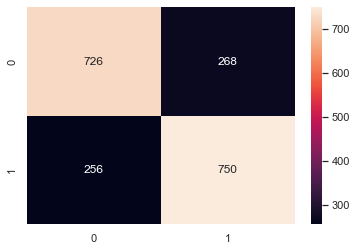

In [42]:
# Print the accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.show()

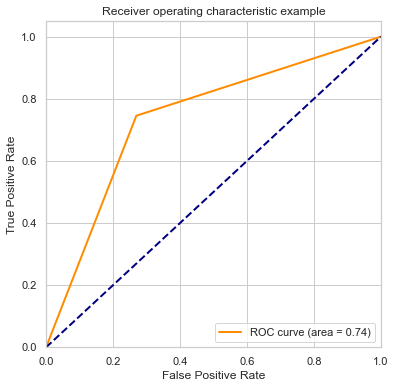

In [43]:
# plot roc-auc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


#### Making Predictions

In [44]:

def predict_text(text):
    # Preprocess the text and transform using the SAME vectorizer
    preprocessed_text = clean_text(text)  # Replace with your preprocessing function
    vectorizer.fit(X_train)
    text_vector = vectorizer.transform([preprocessed_text])

    # Make sentiment prediction
    predicted_sentiment = classifier.predict(text_vector)

    if predicted_sentiment[0] == 1:
        sentiment = "Positive"
    else:
        sentiment = "Negative"

    print("Predicted Sentiment:", sentiment)

In [45]:
# Text to predict sentiment for
text1 = "I hate this product!"
predict_text(text1)

Predicted Sentiment: Negative


In [46]:
text2 = 'WOW ! Such a beautiful day!!!'
predict_text(text2)

Predicted Sentiment: Positive


### LSTM

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping for model training

In [51]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 10000

one_hot_doc=[one_hot(words, n = vocab_size)
           for words in sampled_data['Cleaned_Tweet']
           ]

In [52]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentence_len = 300
embedded_doc = pad_sequences(
    one_hot_doc,
    maxlen = sentence_len,
    padding="pre"
)

In [53]:
extract_features = pd.DataFrame(
    data = embedded_doc
)
target= sampled_data['Sentiment_label']

In [ ]:
sampled_data['Cleaned_Tweet'], sampled_data['Sentiment_label']

In [54]:
df_final = pd.concat([extract_features,target],axis=1)


In [55]:
X = df_final.drop("Sentiment_label",axis=1)
y = df_final["Sentiment_label"]

In [57]:
X_train_val,X_test,y_train_val,y_test = train_test_split(X, y, random_state=42, test_size=0.45)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=42, test_size=0.50)


In [75]:
# Define the model
lstm_model = Sequential()
feature_num = 5000
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=feature_num, input_length=sentence_len))
lstm_model.add(LSTM(units=128))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(units=80, activation='relu'))
lstm_model.add(Dense(units=50, activation='relu'))
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train the model with tuning options
history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=15, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test data
loss, accuracy = lstm_model.evaluate(X_test, y_test)

# Print the loss and accuracy obtained
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/15
43/43 [==============================] - 334s 8s/step - loss: 0.6117 - accuracy: 0.6684 - val_loss: 0.5998 - val_accuracy: 0.6764
Epoch 2/15
43/43 [==============================] - 332s 8s/step - loss: 0.3102 - accuracy: 0.8858 - val_loss: 0.7843 - val_accuracy: 0.6713
Epoch 3/15
43/43 [==============================] - 332s 8s/step - loss: 0.0743 - accuracy: 0.9775 - val_loss: 1.4162 - val_accuracy: 0.6531
Epoch 4/15
43/43 [==============================] - 332s 8s/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 1.6763 - val_accuracy: 0.6524
Epoch 5/15
43/43 [==============================] - 331s 8s/step - loss: 0.0169 - accuracy: 0.9964 - val_loss: 1.9056 - val_accuracy: 0.6516
Epoch 6/15
43/43 [==============================] - 332s 8s/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 1.7311 - val_accuracy: 0.6451
Epoch 7/15
71/71 [==============================] - 114s 2s/step - loss: 0.5682 - accuracy: 0.7187
Loss: 0.5681902170181274
Accuracy: 0.718666672706604


In [76]:
y_pred = lstm_model.predict(X_test)
y_pred = (y_pred>0.5)

71/71 [==============================] - 116s 2s/step


Test Score:71.87%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1122
           1       0.72      0.73      0.72      1128

    accuracy                           0.72      2250
   macro avg       0.72      0.72      0.72      2250
weighted avg       0.72      0.72      0.72      2250

Confusion Matrix:
[[795 327]
 [306 822]]


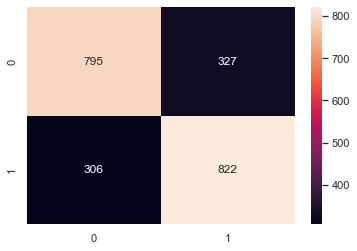

In [77]:
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()